In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("/content/bank-additional-full.csv", sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
print(df.head())
print(df.info())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [7]:
#covert non-numeric yes/no to 1/0
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [8]:
df_processed = pd.get_dummies(df, drop_first=True)

In [9]:
print(df_processed.head())

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_may  month_nov  \
0          -36.4      4.857       5191.0  ...       True      False   
1          -36.4      4.857       5191.0  ...       True      False   
2          -36.4      4.857       5191.0  ...       True      False   
3          -36.4      4.857       5191.0  ...       True      False   
4          -36.4      4.857       5191.0  ...       True      False   

   month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0      False      False         

In [10]:
X = df_processed.drop('y', axis=1)
y = df_processed['y']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Model Accuracy: 0.91


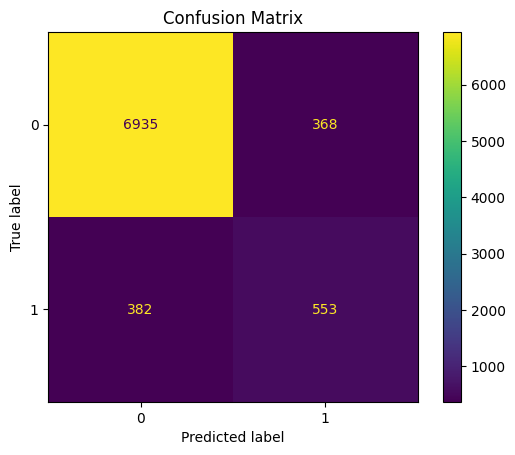

In [15]:
# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Calculate the accuracy: What percentage of predictions were correct?
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display a confusion matrix for a more detailed look at performance
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

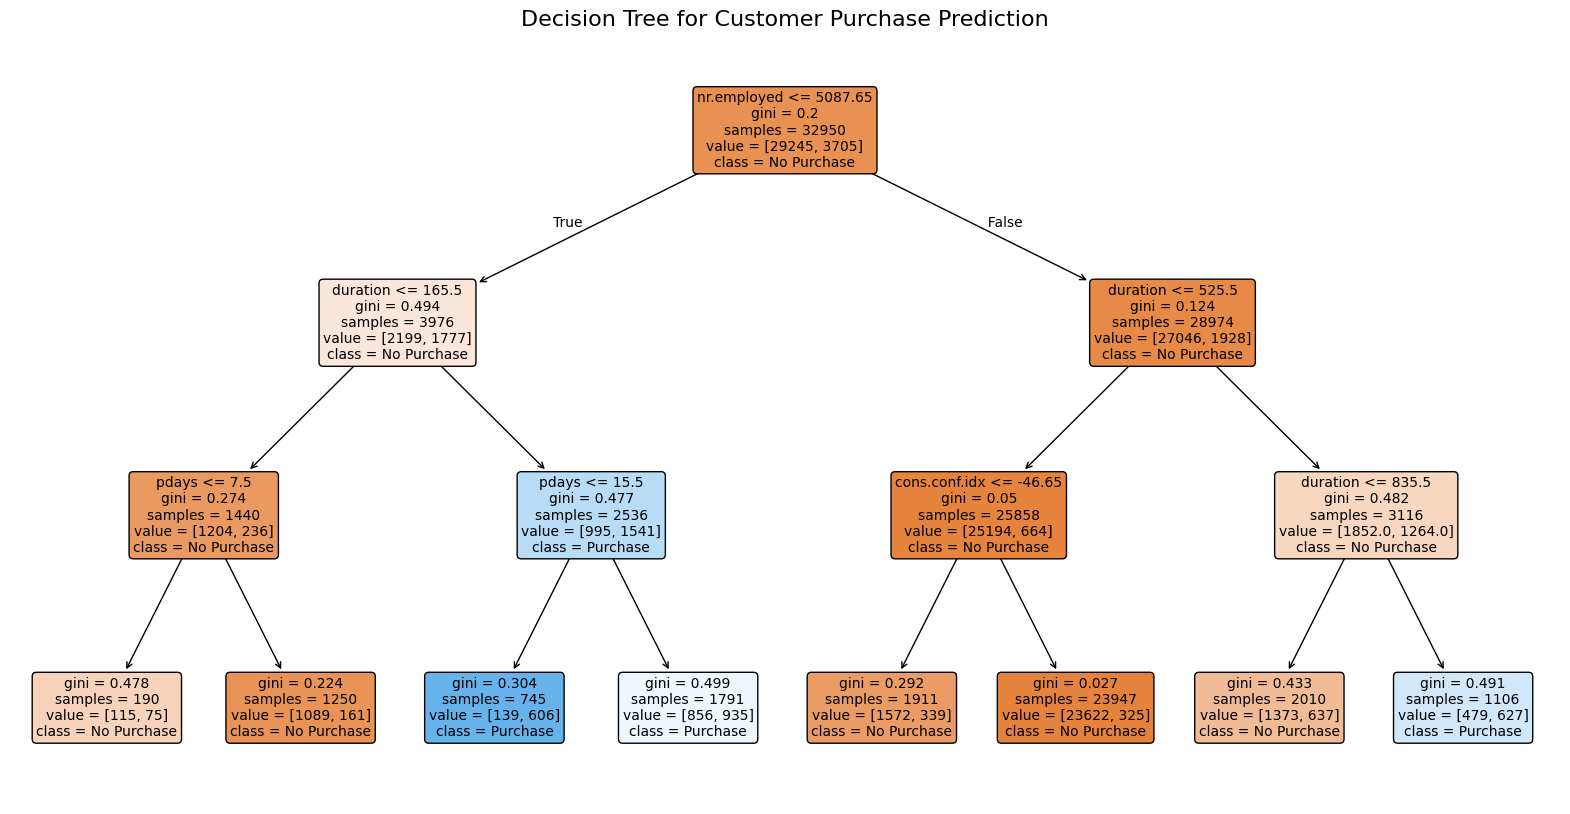

In [16]:
# Create a plot to visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_classifier,
    feature_names=X.columns,
    class_names=['No Purchase', 'Purchase'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Customer Purchase Prediction", fontsize=16)
plt.savefig('decision_tree.png') # Save the tree as an image file
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

# Make predictions and evaluate the new model
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Random Forest Model Accuracy: {rf_accuracy:.2f}")

Random Forest Model Accuracy: 0.91


--- Top 10 Most Important Features ---
             Feature  Importance
1           duration    0.294387
8          euribor3m    0.096394
0                age    0.086628
9        nr.employed    0.054299
2           campaign    0.041348
3              pdays    0.031899
7      cons.conf.idx    0.031851
5       emp.var.rate    0.023205
6     cons.price.idx    0.022315
52  poutcome_success    0.021833


/tmp/ipython-input-36923195.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


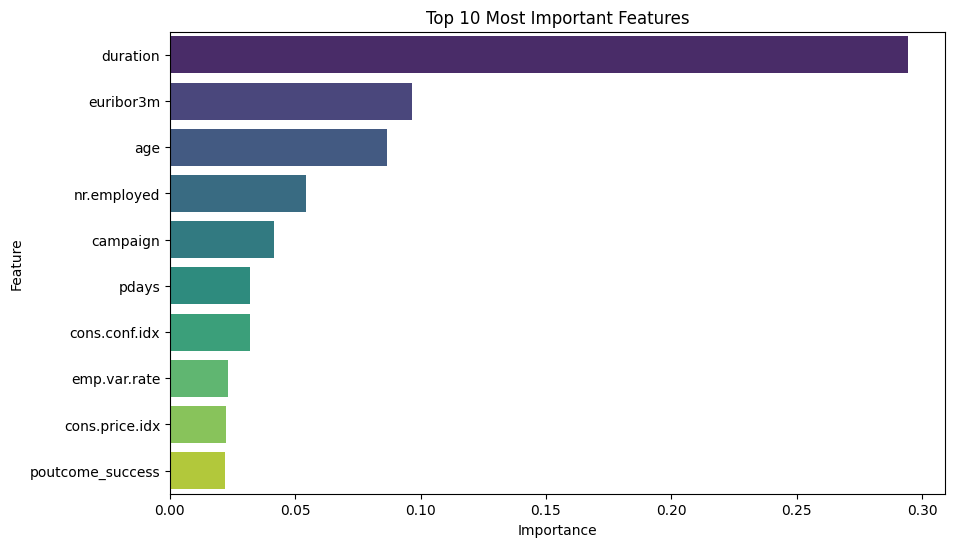

In [18]:
# Get feature importances from the trained Random Forest model
importances = rf_classifier.feature_importances_

# Create a pandas DataFrame for easier viewing
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("--- Top 10 Most Important Features ---")
print(feature_importance_df.head(10))

# Create a bar plot to visualize the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Most Important Features')
plt.show()

In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_classifier, X, y, cv=5)

print(f"\nCross-Validation Scores: {scores}")
print(f"Average Cross-Validation Score: {scores.mean():.2f}")


Cross-Validation Scores: [0.88832241 0.36392328 0.61240592 0.14956902 0.14216341]
Average Cross-Validation Score: 0.43


In [20]:
#Block 1 – Load and Inspect Data

import pandas as pd
from sklearn.datasets import fetch_openml

bank = fetch_openml(name="BankMarketing", version=1, as_frame=True)
df = bank.frame

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
#Block 2 – Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.drop("y", axis=1)
y = df["y"]

for col in X.select_dtypes(include=["category", "object"]).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training and testing sets created successfully.")

Training and testing sets created successfully.


In [22]:
#Block 3 – Train Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

print("Full tree depth:", clf.get_depth())
print("Number of leaves:", clf.get_n_leaves())

Full tree depth: 27
Number of leaves: 2478


In [26]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X, y)


DecisionTreeClassifier()